# Predicting MVP of Polish Basketball League (PLK)
### Using machine learning and data science methods

## Imports

In [1]:
# import useful data scraping, visualizing and machine learning libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             mean_squared_error, precision_score, r2_score,
                             recall_score, silhouette_score)


from bs4 import BeautifulSoup
import requests

import json
from pathlib import Path

print("Imports succeded")

Imports succeded



## Data scraping
Let's get data from plk.pl website archive. We are interested in players' statistics from 2003/04 to 2018/19 seasons. I will use requests and BeautifulSoup to scrape the data.

In [2]:
json_path = Path("/players_stats_archive.json")
if (not json_path.exists()):  # check if data aleady scraped
    seasons = [1,2,3,4,5,6,7,8,9,10,16,17,18,19,20,21,22]  # seasons ids on the website
    mvp_names = ['Tomas Pacesas', 'Adam Wójcik', 'Goran Jagodnik', 'Thomas Kelati', 'David Logan', 'Qyntel Woods', 'Qyntel Woods', 'Torey Thomas', 'Walter Hodge', 'Walter Hodge', 'J.P. Prince','Damian Kulig', 'Mateusz Ponitka', 'Shawn King', 'Ivan Almeida', 'James Florence','Nan']
    df = pd.DataFrame()

    for season,mvp in zip(seasons,mvp_names):
        if (season != 22):
            table = requests.get("https://www.plk.pl/archiwum/" + str(season) + "/tabele.html")
        else:
            table = requests.get("https://www.plk.pl/tabele.html")
        soup = BeautifulSoup(table.text, "html.parser")
        teams = soup.select(".tab0 .druzyna a")
        season_year = soup.select(" #header h1")[0].get_text()
        season_year = season_year[-9:]
        print("%%%" + str(season_year) + "%%%")
        i = 2
        for team in teams:
            if (season != 22):
                link = "https://www.plk.pl/archiwum/" + str(season) + team["href"][:-5] + "/2"
            else:
                link = "https://www.plk.pl" + team["href"][:-5] + "/2"
            
            win_lose = soup.select(".tab0 .druzyna ~ .cntr")[i].get_text()
            win_lose = win_lose.replace(" ", "")
            win_lose_list = win_lose.split("-")
            win_ratio = float(win_lose_list[0]) / (float(win_lose_list[1]) + float(win_lose_list[0]))
            print(win_ratio)
            print(link)
            tmp_df = pd.read_html(requests.get(link).text)[1]
            tmp_df['WR'] = win_ratio
            tmp_df['MVP'] = 0
            tmp_df['season'] = season_year
            tmp_df.columns = tmp_df.columns.droplevel(1)
            tmp_df.loc[tmp_df['zawodnik'] == mvp, 'MVP'] = 1
            df = df.append(tmp_df)
            i += 8
    
else:
    with open("players_stats_archive.json") as json_file:
        dict_data = json.load(json_file)
    df = pd.DataFrame.from_dict(dict_data)
    df.reset_index(level=0, inplace = True)
    
print(df)

%%%2003/2004%%%
0.8181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/768/wks-slask-wroclaw/2
0.7727272727272727
https://www.plk.pl/archiwum/1/druzyny/d/121/asseco-arka-gdynia/2
0.7727272727272727
https://www.plk.pl/archiwum/1/druzyny/d/33/anwil-wloclawek/2
0.6363636363636364
https://www.plk.pl/archiwum/1/druzyny/d/116/polonia-warszawa/2
0.5909090909090909
https://www.plk.pl/archiwum/1/druzyny/d/120/unia-tarnow/2
0.5909090909090909
https://www.plk.pl/archiwum/1/druzyny/d/93/bm-slam-stal-ostrow-wielkopolski/2
0.4090909090909091
https://www.plk.pl/archiwum/1/druzyny/d/2/notec-inowroclaw/2
0.36363636363636365
https://www.plk.pl/archiwum/1/druzyny/d/764/czarni-slupsk/2
0.3181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/4/astoria-bydgoszcz/2
0.3181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/32/azs-koszalin/2
0.22727272727272727
https://www.plk.pl/archiwum/1/druzyny/d/810/olimp-mks-start-lublin/2
0.18181818181818182
https://www.plk.pl/archiwum/1/druzyny/d/46/ks-spojnia-

0.5
https://www.plk.pl/archiwum/8/druzyny/d/67/polpharma-starogard-gdanski/2
0.45454545454545453
https://www.plk.pl/archiwum/8/druzyny/d/113/pbg-basket-poznan/2
0.45454545454545453
https://www.plk.pl/archiwum/8/druzyny/d/32/azs-koszalin/2
0.4090909090909091
https://www.plk.pl/archiwum/8/druzyny/d/769/stelmet-enea-bc-zielona-gora/2
0.4090909090909091
https://www.plk.pl/archiwum/8/druzyny/d/116/polonia-warszawa/2
0.36363636363636365
https://www.plk.pl/archiwum/8/druzyny/d/765/kotwica-kolobrzeg/2
0.18181818181818182
https://www.plk.pl/archiwum/8/druzyny/d/117/siarka-tarnobrzeg/2
%%%2011/2012%%%
0.7916666666666666
https://www.plk.pl/archiwum/9/druzyny/d/112/trefl-sopot/2
0.7083333333333334
https://www.plk.pl/archiwum/9/druzyny/d/115/pge-turow-zgorzelec/2
0.7083333333333334
https://www.plk.pl/archiwum/9/druzyny/d/764/czarni-slupsk/2
0.7083333333333334
https://www.plk.pl/archiwum/9/druzyny/d/33/anwil-wloclawek/2
0.625
https://www.plk.pl/archiwum/9/druzyny/d/769/stelmet-enea-bc-zielona-gora/2

0.53125
https://www.plk.pl/archiwum/20/druzyny/d/121/asseco-arka-gdynia/2
0.46875
https://www.plk.pl/archiwum/20/druzyny/d/67/polpharma-starogard-gdanski/2
0.34375
https://www.plk.pl/archiwum/20/druzyny/d/32/azs-koszalin/2
0.3125
https://www.plk.pl/archiwum/20/druzyny/d/2310/gtk-gliwice/2
0.25
https://www.plk.pl/archiwum/20/druzyny/d/1820/miasto-szkla-krosno/2
0.15625
https://www.plk.pl/archiwum/20/druzyny/d/11/legia-warszawa/2
0.15625
https://www.plk.pl/archiwum/20/druzyny/d/764/czarni-slupsk/2
%%%2018/2019%%%
0.8333333333333334
https://www.plk.pl/archiwum/21/druzyny/d/121/asseco-arka-gdynia/2
0.8
https://www.plk.pl/archiwum/21/druzyny/d/101/polski-cukier-torun/2
0.8
https://www.plk.pl/archiwum/21/druzyny/d/769/stelmet-enea-bc-zielona-gora/2
0.7333333333333333
https://www.plk.pl/archiwum/21/druzyny/d/33/anwil-wloclawek/2
0.6666666666666666
https://www.plk.pl/archiwum/21/druzyny/d/1492/bm-slam-stal-ostrow-wlkp-/2
0.5666666666666667
https://www.plk.pl/archiwum/21/druzyny/d/1490/mks-dabr

In [3]:
df_train = df.copy()
df_train.MVP.value_counts()

0    3889
1      16
Name: MVP, dtype: int64

Data is really imbalanced. Might be a problem in the future.


## Preparing data
Deleting, renaming and adding columns (described in comments)


In [4]:
# dropping insignificant columns
del df_train['za 2'], df_train['za 3'], df_train['za 1'], df_train['bo'], df_train['fw'], df_train['+/-'], df_train['s5']

In [5]:
# renaming columns to more meaningful names
df_train.columns = ['player', 'games', 'pts', 'minutes', 'fgm', 'fga', 'fg%', 'rebOff', 'rebDef', 'rebS', 'assists', 'fouls', 'tovers', 'steals', 'blocks', 'eval','WR', 'MVP', 'season' ]

In [6]:
print(df_train)
print(df_train.columns)

              player  games   pts minutes  fgm   fga   fg%  rebOff  rebDef  \
0         Lynn Greer     32  20.4   32:39  6.8  13.4  50.7     0.6     2.2   
1        Adam Wójcik     32  15.3   26:19  5.4  10.0  54.1     1.8     3.0   
2    Dominik Tomczyk     29  10.2   23:47  3.5   6.4  54.8     1.1     3.2   
3    Michał Ignerski     33   9.1   20:27  3.4   6.7  51.1     1.1     3.2   
4        Ryan Randle     33   8.9   22:54  3.9   6.1  64.2     2.0     4.0   
..               ...    ...   ...     ...  ...   ...   ...     ...     ...   
13        Iwan Wasyl     15   3.0   12:05  1.0   2.4  41.7     0.4     0.7   
14    Darrell Harris     12   2.7   12:45  1.2   3.2  36.8     1.4     2.3   
15      Konrad Dawdo     15   1.5   07:07  0.6   1.6  37.5     0.2     1.0   
16   Radosław Chorab     13   0.5   04:39  0.2   0.4  40.0     NaN     0.2   
17  Franciszek Bigaj      3   NaN   00:20  NaN   0.3   NaN     NaN     NaN   

    rebS  assists  fouls  tovers  steals  blocks  eval        W

In [7]:
# Filling Nans with 0's
df_train.fillna(value=0, inplace=True)

In [8]:
# not needed, only field goal % 
del df_train['fga'], df_train['fgm']

In [9]:
print(df_train.loc[df_train['MVP'] == 1])

            player  games   pts minutes   fg%  rebOff  rebDef  rebS  assists  \
3    Tomas Pacesas     30  10.0   27:16  45.4     0.5     2.1   2.6      5.3   
1      Adam Wójcik     35  13.9   22:35  55.0     1.3     2.3   3.6      1.6   
0   Goran Jagodnik     35  15.2   25:07  43.1     1.2     4.0   5.2      1.2   
0    Thomas Kelati     39  15.7   29:47  51.2     0.3     2.6   2.9      2.1   
0      David Logan     35  18.8   32:56  50.3     0.5     2.4   2.9      1.7   
0     Qyntel Woods     21  19.2   27:38  55.6     1.5     4.8   6.3      1.6   
1     Qyntel Woods     34  14.6   25:13  44.4     1.0     5.7   6.7      2.6   
0     Torey Thomas     41  14.4   32:10  39.0     1.0     3.2   4.2      5.7   
0     Walter Hodge     45  19.4   32:05  42.1     0.6     2.3   2.9      5.7   
0     Walter Hodge     42  17.8   29:05  46.0     0.3     1.7   2.0      4.5   
0      J.P. Prince     44  16.4   29:12  52.6     1.4     3.9   5.3      3.1   
0     Damian Kulig     43  14.4   25:03 

In [10]:
# only sum of rebounds imortant, no need to split them into off and def
del df_train['rebOff'], df_train['rebDef']
# reset id
df_train = df_train.reset_index(drop=True)
# not interested in seconds, only minutes played
df_train[['min','sec']] = df_train.minutes.str.split(":", expand=True)
del df_train['minutes'], df_train['sec']
df_train['min'] = pd.to_numeric(df_train['min'])

In [11]:
df_train

,player,games,pts,fg%,rebS,assists,fouls,tovers,steals,blocks,eval,WR,MVP,season,min
0,Lynn Greer,32,20.4,50.7,2.8,4.6,2.6,3.0,1.3,0.1,18.7,0.818182,0,2003/2004,32
1,Adam Wójcik,32,15.3,54.1,4.8,1.9,2.8,1.8,0.5,0.6,15.2,0.818182,0,2003/2004,26
2,Dominik Tomczyk,29,10.2,54.8,4.2,1.4,2.0,0.5,1.3,0.4,13.6,0.818182,0,2003/2004,23
3,Michał Ignerski,33,9.1,51.1,4.2,0.7,2.2,0.9,0.5,0.0,9.6,0.818182,0,2003/2004,20
4,Ryan Randle,33,8.9,64.2,6.0,0.6,2.8,1.2,1.2,0.6,12.9,0.818182,0,2003/2004,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,Iwan Wasyl,15,3.0,41.7,1.1,0.4,1.8,0.7,0.1,0.1,2.3,0.200000,0,2019/2020,12
3901,Darrell Harris,12,2.7,36.8,3.7,0.3,2.3,0.8,0.4,0.3,4.4,0.200000,0,2019/2020,12
3902,Konrad Dawdo,15,1.5,37.5,1.2,0.1,1.0,0.1,0.1,0.1,1.8,0.200000,0,2019/2020,7
3903,Radosław Chorab,13,0.5,40.0,0.2,0.1,1.0,0.1,0.1,0.0,0.4,0.200000,0,2019/2020,4


In [12]:
df_train.info()
# sanity check, all numbers should be equal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   player   3905 non-null   object 
 1   games    3905 non-null   int64  
 2   pts      3905 non-null   float64
 3   fg%      3905 non-null   float64
 4   rebS     3905 non-null   float64
 5   assists  3905 non-null   float64
 6   fouls    3905 non-null   float64
 7   tovers   3905 non-null   float64
 8   steals   3905 non-null   float64
 9   blocks   3905 non-null   float64
 10  eval     3905 non-null   float64
 11  WR       3905 non-null   float64
 12  MVP      3905 non-null   int64  
 13  season   3905 non-null   object 
 14  min      3905 non-null   int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 457.7+ KB


In [13]:
with open('players_stats_archive.json', 'w', encoding='utf-8') as file:
    df_train.to_json(file, force_ascii=False)

## End of preparing data (DEBUG)
#### If u have already scraped the data, start from here. This prevents scraping data multiple times. 

In [14]:
with open("players_stats_archive.json") as json_file:
    dict_data = json.load(json_file)
    df = pd.DataFrame.from_dict(dict_data)
    df.reset_index(level=0, inplace = True)
df_train = df.copy()

In [24]:
for x in range(3,20):
    x1 = 2000 + x
    season_string = str(x1) + "/" + str(x1+1)
    print("sezon " + season_string)
    print(df_train.loc[df_train['season'] ==  season_string].shape[0])

sezon 2003/2004
199
sezon 2004/2005
200
sezon 2005/2006
268
sezon 2006/2007
241
sezon 2007/2008
226
sezon 2008/2009
239
sezon 2009/2010
224
sezon 2010/2011
191
sezon 2011/2012
198
sezon 2012/2013
192
sezon 2013/2014
190
sezon 2014/2015
245
sezon 2015/2016
268
sezon 2016/2017
265
sezon 2017/2018
259
sezon 2018/2019
256
sezon 2019/2020
244


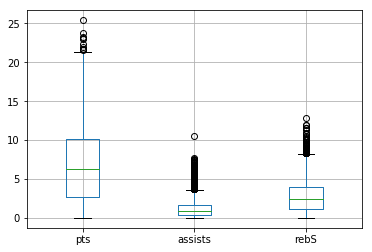

In [17]:
boxplot = df_train.boxplot(column= ['pts', 'assists', 'rebS'])

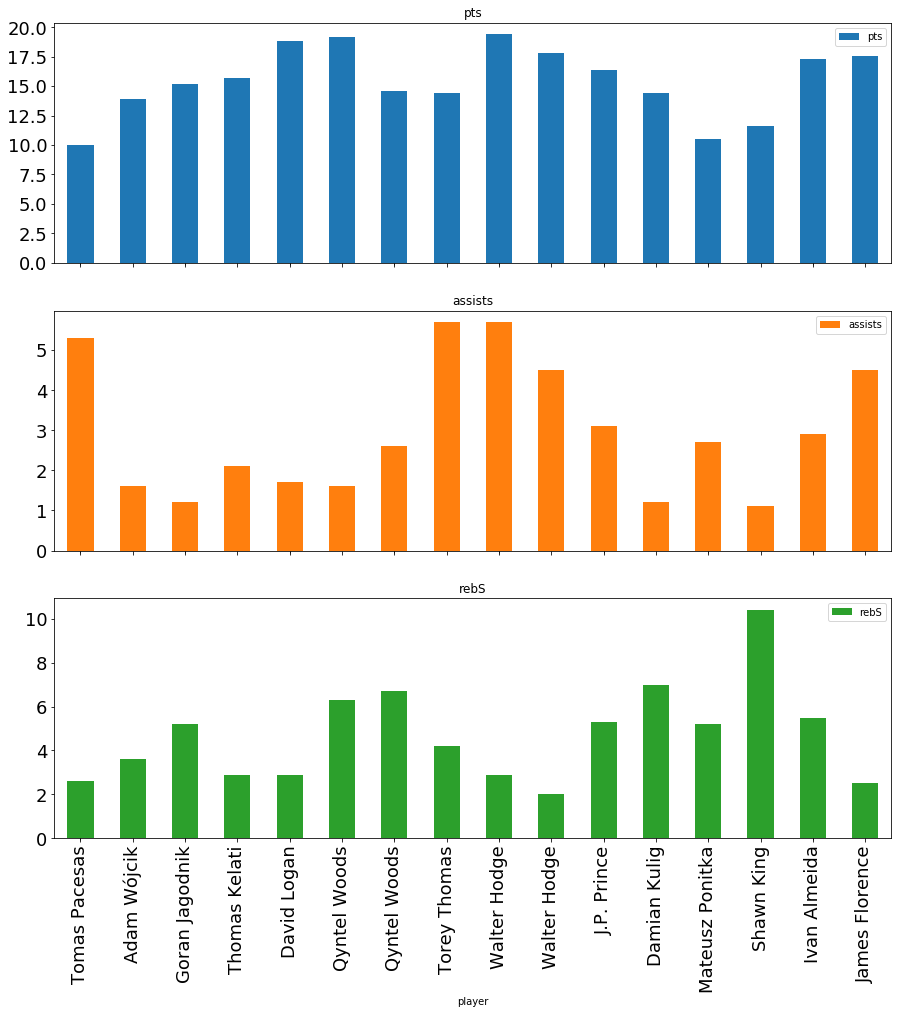

In [30]:
mvps = df_train.loc[df_train['MVP'] == 1]
ax = mvps.plot.bar(x='player',y=['pts', 'assists', 'rebS'], subplots= True, fontsize=18, figsize=(15,15))

## Data importance
 I have to normalize data, because I do not want 30 minutes per game to be more important than for example 4 assists.

In [31]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtype == 'int64' or df[feature_name].dtype == 'float64':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [32]:
df_train = normalize(df_train)
df_train.sort_values(by=['pts'], ascending = False)

,index,player,games,pts,fg%,rebS,assists,fouls,tovers,steals,blocks,eval,WR,MVP,season,min
1757,1757,Ted Scott,0.387755,1.000000,0.440,0.343750,0.200000,0.50,0.547170,0.300,0.032258,0.807818,0.393939,0.0,2010/2011,0.894737
1597,1597,Bobby Brown,0.061224,0.937008,0.435,0.234375,0.409524,0.40,0.377358,0.450,0.000000,0.863192,0.837121,0.0,2010/2011,0.842105
573,573,Chudney Gray,0.448980,0.917323,0.448,0.367188,0.552381,0.52,0.622642,0.525,0.064516,0.882736,0.500000,0.0,2005/2006,0.947368
285,285,Michael Ansley,0.551020,0.909449,0.480,0.625000,0.180952,0.58,0.396226,0.275,0.032258,0.957655,0.590909,0.0,2004/2005,0.947368
2598,2598,Dominique Johnson,0.367347,0.905512,0.539,0.265625,0.371429,0.58,0.471698,0.475,0.096774,0.970684,0.252778,0.0,2014/2015,0.973684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,2611,Kamil Karliński,0.020408,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.228013,0.252778,0.0,2014/2015,0.026316
2583,2583,Wojciech Hałas,0.102041,0.000000,0.000,0.015625,0.019048,0.04,0.000000,0.000,0.000000,0.221498,0.325000,0.0,2014/2015,0.026316
148,148,Dorian Szyttenholm,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.188679,0.000,0.000000,0.162866,0.344697,0.0,2003/2004,0.026316
2546,2546,Juliusz Barański,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.228013,0.361111,0.0,2014/2015,0.026316


In [33]:
tmp_pd_train = df_train.loc[df_train['season'] != '2019/20020']

tmp_pd_test = df_train.loc[df_train['season'] == '2019/2020']
print(tmp_pd_test)
#X = df_train[['ts', 'steals', 'min', 'WR', 'rebS', 'assists', 'eval']].values
y_train = tmp_pd_train['MVP']
del tmp_pd_train['MVP']
X_train = tmp_pd_train[['pts', 'rebS', 'assists', 'steals', 'blocks', 'WR', 'min', 'fg%','eval']].values
y_test = tmp_pd_test['MVP']
del tmp_pd_test['MVP']
X_test = tmp_pd_test[['pts', 'rebS', 'assists', 'steals', 'blocks', 'WR', 'min', 'fg%','eval']].values
y_test

     index            player     games       pts    fg%      rebS   assists  \
3661  3661        Ricky Ledo  0.367347  0.665354  0.452  0.382812  0.447619   
3662  3662    Mckenzie Moore  0.000000  0.629921  0.667  0.390625  0.190476   
3663  3663       Chase Simon  0.265306  0.539370  0.507  0.156250  0.161905   
3664  3664       Tony Wroten  0.306122  0.476378  0.537  0.257812  0.580952   
3665  3665       Shawn Jones  0.244898  0.460630  0.623  0.609375  0.104762   
...    ...               ...       ...       ...    ...       ...       ...   
3900  3900        Iwan Wasyl  0.285714  0.118110  0.417  0.085938  0.038095   
3901  3901    Darrell Harris  0.224490  0.106299  0.368  0.289062  0.028571   
3902  3902      Konrad Dawdo  0.285714  0.059055  0.375  0.093750  0.009524   
3903  3903   Radosław Chorab  0.244898  0.019685  0.400  0.015625  0.009524   
3904  3904  Franciszek Bigaj  0.040816  0.000000  0.000  0.000000  0.000000   

      fouls    tovers  steals    blocks      eval  

3661    0.0
3662    0.0
3663    0.0
3664    0.0
3665    0.0
       ... 
3900    0.0
3901    0.0
3902    0.0
3903    0.0
3904    0.0
Name: MVP, Length: 244, dtype: float64

### Data is imbalanced, so I will use SMOTE (synthetically create more mvps)

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [34]:
y_train
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0.0: 3889, 1.0: 16}

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1_score: 0.0
(244, 2)
(244, 3)
[[0.9470028154435749 0.05299718455642507 'Ricky Ledo']
 [0.9625653631522774 0.03743463684772261 'Tweety Carter']
 [0.962677237768123 0.03732276223187706 'Alade Aminu']
 [0.9684008324934773 0.0315991675065227 'Josh Bostic']
 [0.9718476518017815 0.02815234819821859 'Brynton Lemar']
 [0.9720692212437584 0.02793077875624163 'Tony Wroten']
 [0.9736675572769814 0.026332442723018604 'Chris Wright']
 [0.9742544288236926 0.025745571176307346 'Keith Hornsby']
 [0.9754727538493877 0.024527246150612303 'Jarosław Zyskowski']
 [0.9763458328773698 0.0236541671226302 'Shawn Jones']
 [0.9780763194888086 0.021923680511191413 'Chris Dowe']
 [0.979194605412336 0.020805394587663898 'Obie Trotter']
 [0.9798507143523691 0.020149285647630823 'Mckenzie Moore']
 [0.9800619139340381 0.01993808606596192 'Raymond Cowels III']
 [0.9804159124385923 0.019584087561407674 'Ludvig Hakanson']
 [0.981465463510996 0.018534536489004 'Drew Gordon']
 [0.

/home/qubbec/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/qubbec/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/qubbec/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


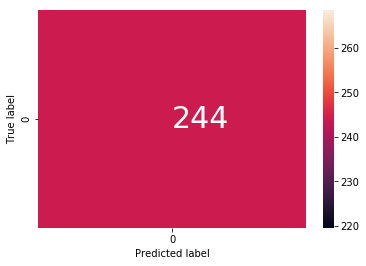

In [38]:
# predict current season mvp and display results, the second number is the probability that the player 
# belongs to the mvp "group"
pred = model.predict_proba(X_test)
print(pred.shape)
result = np.c_[pred, tmp_pd_test['player']]
print(result.shape)
result = result[result[:,0].argsort()]
print(result)
print(y_test)